In [1]:
import random as rn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

In [2]:
X = np.load("dataset/data.npy")
labels = np.load("dataset/label.npy")

In [3]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

labelEncoder = LabelEncoder()
y = labelEncoder.fit_transform(labels)
y = to_categorical(y, 10)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import GridSearchCV
import tensorflow as tf

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (2500, 150, 150, 3)
x_test shape:  (626, 150, 150, 3)
y_train shape:  (2500, 10)
y_test shape:  (626, 10)


In [6]:
# know neural ntwrk architecture # work in sequential model
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam

In [7]:
# modelling 
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size=(5,5), padding = "Same", activation="relu", input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding  = "Same", activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3), padding  = "Same", activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3), padding  = "Same", activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3), padding  = "Same", activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [8]:
# preprocess
from keras.preprocessing.image import ImageDataGenerator
# data augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,   # set each sample mean to 0
    featurewise_std_normalization=False,   # divide inputs by std of the dataset
    samplewise_std_normalization= False,   # divide each input by its std
    zca_whitening=False,   # dimesion reduction
    rotation_range=10,    # randomly rotate images in the range 10 degrees
    zoom_range=0.1,      # Randomly zoom image 10%
    width_shift_range=0.2,   # randomly shift images horizontally 20%
    height_shift_range=0.2,   # randomly shift images vertically 20%
    horizontal_flip=True,     # randomly flip images
    vertical_flip=False    # randomly flip images
)
datagen.fit(x_train)

In [9]:
model.compile(optimizer=Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics = ["accuracy"])

In [10]:
# Train the model
batch_size = 128
epochs = 100

history = model.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    steps_per_epoch=len(x_train) // batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test))

Epoch 1/100
19/19 [==============================] - 25s 1s/step - loss: 7.3679 - accuracy: 0.1083 - val_loss: 2.3029 - val_accuracy: 0.1038
Epoch 2/100
19/19 [==============================] - 28s 1s/step - loss: 2.1433 - accuracy: 0.1948 - val_loss: 2.0462 - val_accuracy: 0.2348
Epoch 3/100
19/19 [==============================] - 27s 1s/step - loss: 1.9696 - accuracy: 0.2698 - val_loss: 1.8592 - val_accuracy: 0.3211
Epoch 4/100
19/19 [==============================] - 26s 1s/step - loss: 1.7445 - accuracy: 0.3621 - val_loss: 1.6961 - val_accuracy: 0.3818
Epoch 5/100
19/19 [==============================] - 28s 1s/step - loss: 1.6932 - accuracy: 0.3869 - val_loss: 1.6371 - val_accuracy: 0.3866
Epoch 6/100
19/19 [==============================] - 30s 2s/step - loss: 1.5296 - accuracy: 0.4473 - val_loss: 1.6378 - val_accuracy: 0.4393
Epoch 7/100
19/19 [==============================] - 200s 11s/step - loss: 1.5216 - accuracy: 0.4448 - val_loss: 1.4624 - val_accuracy: 0.4601
Epoch 8/100

In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test)

20/20 [==============================] - 2s 85ms/step - loss: 1.5495 - accuracy: 0.6853


In [13]:
# Save the model
model.save("model/flower-recognition-model-100-epochs-1-extralayer.h5")

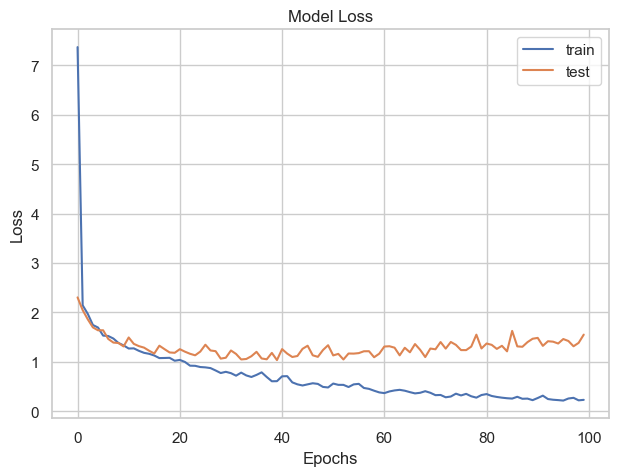

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()